In [0]:
!pip install torch

In [0]:
import torch

In [0]:
torch.zeros([3,4])

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [0]:
a = torch.ones([5,4])
b = torch.Tensor([[1,2,3,4],
                  [5,6,7,8],
                  [9,10,11,12],
                  [13,14,15,16],
                  [17,18,19,20]])

In [0]:
 a % b

tensor([[0., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [0]:
b[0] + a[2]

tensor([2., 3., 4., 5.])

In [0]:
b[0]

tensor([1., 2., 3., 4.])

In [0]:
a[2]

tensor([1., 1., 1., 1.])

In [0]:
 a + b


tensor([[ 2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9.],
        [10., 11., 12., 13.],
        [14., 15., 16., 17.],
        [18., 19., 20., 21.]])

In [0]:
a.shape

torch.Size([5, 4])



Реализуйте при помощи pyTorch функцию, которая возвращает сумму (x.sum()) элементов тензора X, строго превышающих значение limit, которое является входным значением алгоритма.

Входная матрица: X = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

Sample Input:

1

Sample Output:

tensor(44)



In [0]:

x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
limit = int(input())

larger_than_limit_sum = x[x>1].sum()

print(larger_than_limit_sum)

1
tensor(44)


In [0]:
torch.cuda.is_available()

True

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu" )
device

device(type='cuda', index=0)

In [0]:
x = torch.rand([2000,3000])
x_cuda = x.to(device)
x_cuda
%time y = (x-x+x*10)**2

CPU times: user 12.7 ms, sys: 35.1 ms, total: 47.8 ms
Wall time: 48.1 ms


In [0]:
%time y = (x_cuda-x_cuda+x_cuda*10)**2

CPU times: user 1.9 ms, sys: 321 µs, total: 2.22 ms
Wall time: 1.6 ms


In [0]:
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


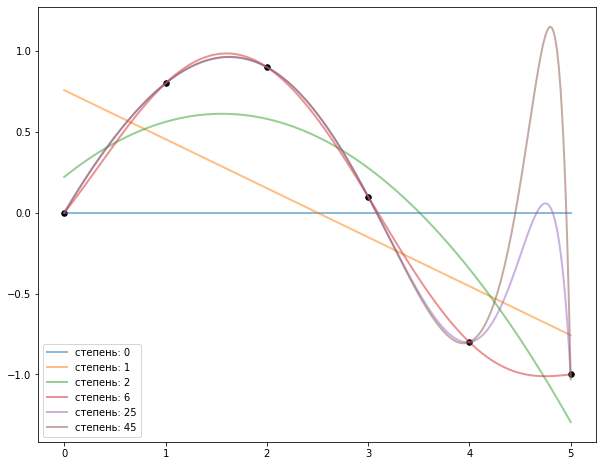

In [0]:
x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
t = np.linspace(x[0] - 1e-3, x[-1] + 1e-3, 300)

plt.figure(figsize=(10, 8))
plt.scatter(x, y, s=30, c="k")
for degree in [0, 1, 2, 6, 25, 45]:
    z = np.polyfit(x, y, deg=degree)
    p = np.poly1d(z)
    plt.plot(t, p(t), alpha=0.5, linewidth=2, label=u"степень: {}".format(degree))
plt.legend()
plt.savefig("./interpolate.png", dpi=300)
plt.show()



Реализуйте расчет градиента для функции f(w)=∏i,jloge(loge(wi,j +7))f(w) = \prod\limits_{i,j}{log_{e}(log_{e}({w_{i,j} + 7}}))f(w)=i,j∏​loge​(loge​(wi,j​ +7)) в точке w =[[5,10],[1,2]]w = [[5, 10], [1, 2]]w =[[5,10],[1,2]]

Подсказка: перемножить все значения функции можно с помощью метода prod

Sample Input:

anything

Sample Output:

tensor([[0.0201, 0.0109],
        [0.0449, 0.0351]])



In [0]:
import torch
import math
print(math.log(4))

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu" )
inp = [[5,10],[1,2]]
w =  torch.tensor(inp ,dtype=torch.float, requires_grad=True)# put our code here
w = w.to(device)
w.retain_grad() # or  device=deviceToUse before requires_grad=True
print(w)
function =  torch.log(torch.log(w+7)).prod()
function.backward()

print(w.grad)


1.3862943611198906
tensor([[ 5., 10.],
        [ 1.,  2.]], device='cuda:0', grad_fn=<CopyBackwards>)
tensor([[0.0201, 0.0109],
        [0.0449, 0.0351]], device='cuda:0')


In [0]:
? torch.log



Реализуйте градиентный спуск для той же функции f(w)=∏i,jloge(loge(wij+7))f(w) = \prod\limits_{i,j}{log_{e}(log_{e}({w_{ij} + 7}}))f(w)=i,j∏​loge​(loge​(wij​+7))

Пусть начальным приближением будет wt=0 =[[5,10],[1,2]]w^{t=0} = [[5, 10], [1, 2]]wt=0 =[[5,10],[1,2]] , шаг градиентного спуска alpha=0.001alpha=0.001alpha=0.001.

Чему будет равен wt=500w^{t=500}wt=500?

Sample Input:

anything

Sample Output:

tensor([[4.9900, 9.9948],
        [0.9775, 1.9825]], requires_grad=True)



In [0]:
w = torch.tensor([[5., 10.], [1., 2.]], requires_grad=True)
alpha = 0.001

for _ in range(500):
    # it's critical to calculate function inside the loop:
    function = (w + 7).log().log().prod()
    function.backward()
    w.data -= alpha*w.grad # put our code here
    # something is missing here!
    w.grad.zero_()

print(w)

tensor([[4.9900, 9.9948],
        [0.9775, 1.9825]], requires_grad=True)


In [0]:
#print(function.grad_fn)
#print(function.grad_fn.next_functions[0][0]) #and so on- add ".next_functions[0][0] ...""b

https://stepik.org/lesson/236466/step/9?unit=208889


Перепишите пример, используя torch.optim.SGD

Изменился ли ответ?

Sample Input:

anything

Sample Output:

tensor([[4.9900, 9.9948],
        [0.9775, 1.9825]], requires_grad=True)



In [0]:
import torch
w = torch.tensor([[5., 10.], [1., 2.]], requires_grad=True)
alpha = 0.001

optimizer = torch.optim.SGD([w], lr = 0.001)

def logariphm(variable):
  return (w + 7).log().log().prod()

def make_gradient_step (function, variable):  
    # it's critical to calculate function inside the loop:
    function = logariphm(variable)
    function.backward()
    optimizer.step()
    optimizer.zero_grad()
for _ in range(500):
  make_gradient_step(logariphm,w)


print(w)

tensor([[4.9900, 9.9948],
        [0.9775, 1.9825]], requires_grad=True)


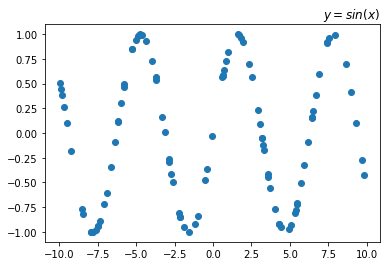

In [0]:
import matplotlib.pyplot as plt
import torch 
x_train = torch.rand(100)
x_train = x_train*20.0 - 10.0
y_train = torch.sin(x_train)
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title("$y=sin(x)$", loc='right')
? plt.title

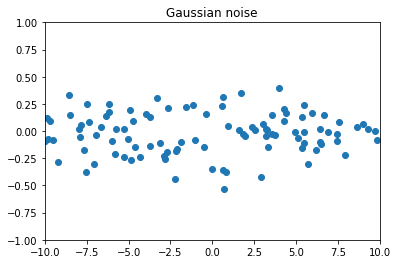

In [0]:
noise = torch.randn(y_train.shape)/5.
plt.plot(x_train.numpy(), noise.numpy(),"o")
plt.axis([-10,10,-1,1])
plt.title("Gaussian noise")
?torch.randn
#print(y_train.shape)

Text(0, 0.5, 'y_train')

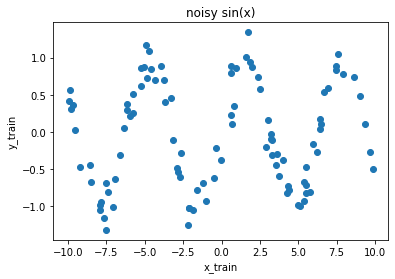

In [0]:
y_train = y_train+ noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title("noisy sin(x)")
plt.xlabel("x_train")
plt.ylabel("y_train")

In [0]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

tensor([[-1.0519],
        [-0.6680],
        [ 0.2590],
        [-0.7844],
        [-1.0491],
        [-0.4918],
        [-0.5970],
        [-0.2731],
        [ 0.4051],
        [ 1.3422],
        [ 0.4817],
        [ 1.0446],
        [ 0.4617],
        [-1.3205],
        [-0.1028],
        [-0.7221],
        [ 0.0214],
        [ 0.2136],
        [ 0.3708],
        [-0.8092],
        [-0.4388],
        [ 0.2258],
        [-0.6761],
        [ 0.8894],
        [-0.3154],
        [ 0.5811],
        [ 0.0466],
        [ 0.1057],
        [-0.1957],
        [ 0.0495],
        [-0.1056],
        [-0.9327],
        [ 0.8883],
        [-0.8282],
        [ 0.8937],
        [-0.2115],
        [-0.2908],
        [ 0.8476],
        [ 0.6133],
        [-0.6388],
        [ 0.9373],
        [-0.9395],
        [ 0.7290],
        [ 0.5387],
        [-1.0219],
        [-0.4435],
        [-1.0171],
        [-1.0289],
        [ 0.7998],
        [-0.6125],
        [ 0.3633],
        [ 0.8584],
        [-0.

In [0]:
?torch.unsqueeze

Text(0, 0.5, 'y_validation')

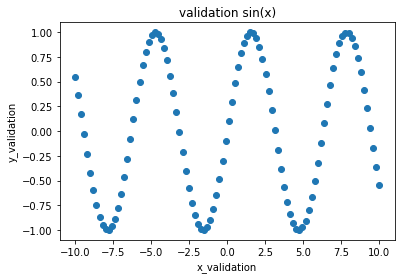

In [0]:
x_validation = torch.linspace(-10,10,100)
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title("validation sin(x)")
plt.xlabel("x_validation")
plt.ylabel("y_validation")

In [0]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)

tensor([[ 0.5440],
        [ 0.3646],
        [ 0.1703],
        [-0.0308],
        [-0.2308],
        [-0.4213],
        [-0.5947],
        [-0.7439],
        [-0.8629],
        [-0.9467],
        [-0.9921],
        [-0.9971],
        [-0.9615],
        [-0.8869],
        [-0.7761],
        [-0.6338],
        [-0.4658],
        [-0.2787],
        [-0.0804],
        [ 0.1213],
        [ 0.3180],
        [ 0.5017],
        [ 0.6651],
        [ 0.8014],
        [ 0.9051],
        [ 0.9720],
        [ 0.9994],
        [ 0.9861],
        [ 0.9327],
        [ 0.8414],
        [ 0.7158],
        [ 0.5612],
        [ 0.3837],
        [ 0.1906],
        [-0.0103],
        [-0.2107],
        [-0.4026],
        [-0.5781],
        [-0.7300],
        [-0.8523],
        [-0.9399],
        [-0.9893],
        [-0.9985],
        [-0.9670],
        [-0.8962],
        [-0.7889],
        [-0.6496],
        [-0.4839],
        [-0.2984],
        [-0.1008],
        [ 0.1008],
        [ 0.2984],
        [ 0.

In [0]:
class SineNet(torch.nn.Module):
  def __init__(self, n_hidden_neurons):
    super(SineNet, self).__init__()
    self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
    self.act1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)
  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    return x
sine_net = SineNet(50)

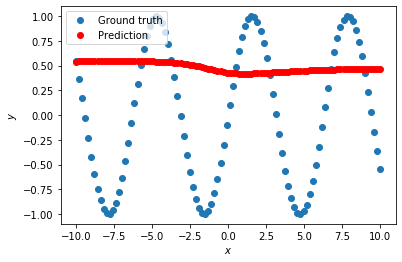

In [0]:
def predict(net, x, y):
  y_pred = net.forward(x)
  plt.plot(x.numpy(),y.numpy(),"o", label = "Ground truth")
  plt.plot(x.numpy(),y_pred.data.numpy(),"o", c = "r", label = "Prediction")
  plt.legend(loc = "upper left")
  plt.xlabel("$x$")
  plt.ylabel("$y$")
predict(sine_net, x_validation, y_validation)



Давайте попрактикуемся с SineNet:

1) Добавим еще один fc-слой

2) Заменим активацию между слоями на гиперболический тангенс

Sample Input:

20

Sample Output:

SineNet(
  (fc1): Linear(in_features=1, out_features=20, bias=True)
  (act1): Tanh()
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (act2): Tanh()
  (fc3): Linear(in_features=20, out_features=1, bias=True)
)



In [0]:
import torch


class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons=20):
        super(SineNet, self).__init__()
        # put our code here
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons, bias=True)
        self.act1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons, bias=True)
        self.act2 = torch.nn.Tanh()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 1, bias=True)

    def forward(self, x):
        # put our code here
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)    
        return x

sine_net = SineNet(int(input()))
sine_net.forward(torch.Tensor([1.]))

print(sine_net)

30
SineNet(
  (fc1): Linear(in_features=1, out_features=30, bias=True)
  (act1): Tanh()
  (fc2): Linear(in_features=30, out_features=30, bias=True)
  (act2): Tanh()
  (fc3): Linear(in_features=30, out_features=1, bias=True)
)


In [0]:
optimizer = torch.optim.Adam(sine_net.parameters(),lr = 0.01)

In [0]:
def loss(pred, target):
  squares = (pred-target)**2
  return squares.mean()

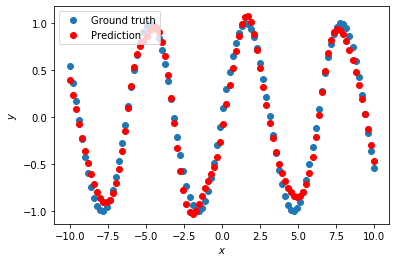

In [0]:
for epoch_index in range(2000):
  optimizer.zero_grad()
  y_predict = sine_net.forward(x_train)
  loss_val = loss(y_predict, y_train)
  loss_val.backward()
  optimizer.step()

predict(sine_net, x_validation, y_validation)



Обучим нейронную сеть для задачи регрессии:

Возьмем более сложную функцию в качестве таргета: y=2xsin(2−x)y=2^x sin(2^{-x})y=2xsin(2−x).

Кроме того, мы хотим получить хорошую метрику MAE на валидации: MAE=1l∑i=1l∣y_predi−y_targeti∣{MAE} = {\frac {1}{l}}\sum _{i=1}^{l}{|y\_pred_{i}-{y\_target_{i}}|}MAE=l1​∑i=1l​∣y_predi​−y_targeti​∣, тогда как знакомая нам MSE выглядит как MSE=1l∑i=1l(y_predi−y_targeti)2{MSE} = {\frac {1}{l}}\sum _{i=1}^{l}(y\_pred_{i}-{y\_target_{i}})^{2} MSE=l1​∑i=1l​(y_predi​−y_targeti​)2

Вот пример того, как нейросеть может отрабатывать на данной функции:![alt text](https://ucarecdn.com/9adeea4b-ed9a-468f-a6d1-2191c1c21e4b/)

Данный пример показывает MAE на валидации ~0.021 . Получите метрику не хуже 0.03

Что можно варьировать: 

1) Архитектуру сети

2) loss-функцию

3) lr оптимизатора

4) Количество эпох в обучении

Удачи!

Sample Input:

anything

Sample Output:

0.03



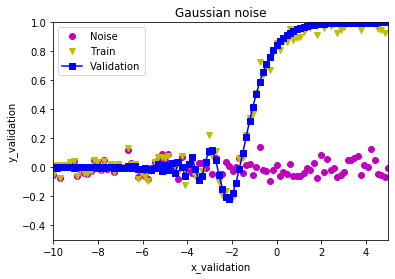

In [0]:
import matplotlib.pyplot as plt
import torch 

#x_train = torch.rand(100)
x_train =  torch.linspace(-10, 5, 100)
#x_train = x_train*20.0 - 10.0
y_train = 2**(x_train)*torch.sin(2**(-x_train))
x_train.unsqueeze_(1)


#plt.title("$y=sin(x)$", loc='right')

noise = torch.randn(y_train.shape)/20.
plt.plot(x_train.numpy(), noise.numpy(),"o", c = "m", marker="o", label = "Noise")
plt.axis([-10,5,-0.5,1])
plt.title("Gaussian noise")

y_train = y_train+ noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o', c = "y", label = "Train", marker="v")
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10,5,100)
y_validation = 2**(x_validation.data)*torch.sin(2**(-x_validation.data))
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o', marker="s",ls = "solid", c = "b", label = "Validation")
#plt.title("validation sin(x)")
plt.xlabel("x_validation")
plt.ylabel("y_validation")
plt.legend(loc = "upper left")

x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)

class SineNet(torch.nn.Module):
    def foo(self):
      pass
      #return res
    def __init__(self, n_hidden_neurons=10):
        super(SineNet, self).__init__()
        # put our code here
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons, bias=True)
        self.act1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons, bias=True)
        self.act2 = torch.nn.Tanh()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 1, bias=True)

    def forward(self, x):
        # put our code here
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)    
        return x

sine_net = SineNet()
#x_train.unsqueeze_(1)
#y_train.unsqueeze_(1)
#sine_net.forward(x_train)

#print(sine_net)

optimizer = torch.optim.Adam(sine_net.parameters(),lr = 0.020)
def loss(pred, target):
  res = torch.abs(pred-target)  
  return res.mean()

In [0]:
for epoch_index in range(257):
  optimizer.zero_grad()
  y_predict = sine_net.forward(x_train)  
  loss_val = loss(y_predict, y_train)
  loss_val.backward()
  optimizer.step()

#plt.plot(x_train.data.numpy(), y_predict.data.numpy(), '^', c = "r", label = "Prediction")
#plt.title("$y=sin(x)$", loc='right')
"""
def predict(net, x, y):
  y_pred = net.forward(x)
  plt.plot(x.numpy(),y.numpy(),"o", label = "Ground truth")
  plt.plot(x.numpy(),y_pred.data.numpy(),"^", c = "r", label = "Prediction")
  plt.legend(loc = "upper left")
  plt.xlabel("$x$")
  plt.ylabel("$y$")
predict(sine_net, x_validation, y_validation)
"""
def metric(pred, target):
    return (pred - target).abs().mean()

print(metric(sine_net.forward(x_validation), y_validation).item())
#metric=0.02794426679611206
#n_hidden_neurons=14
#epoch_index in range(77)
#lr = 0.07

0.029435208067297935


In [0]:
#was in the task
import torch

class RegressionNet(torch.nn.Module):
    # your code here

net = RegressionNet()

def target_function(x):
    return 2**x * torch.sin(2**-x)

# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:

def metric(pred, target):
    return (pred - target).abs().mean()

optimizer = torch.optim.Adam(net.parameters(), lr=#choose your step#)

def loss(pred, target):
    # your code here

for epoch_index in range(#choose epoches number#):
    optimizer.zero_grad()

    y_pred = # make forward
    loss_value = loss(y_pred, y_train)
    # make backward
    # make step

print(metric(net.forward(x_validation), y_validation).item())

IndentationError: ignored

In [0]:
#my variant

import torch

class RegressionNet(torch.nn.Module):
    # your code here
    def __init__(self, n_hidden_neurons=10):
        super(RegressionNet, self).__init__()
        # put our code here
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons, bias=True)
        self.act1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons, bias=True)
        self.act2 = torch.nn.Tanh()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 1, bias=True)

    def forward(self, x):
        # put our code here
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)    
        return x

net = RegressionNet()

def target_function(x):
    return 2**x * torch.sin(2**-x)

# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:

def metric(pred, target):
    return (pred - target).abs().mean()

optimizer = torch.optim.Adam(net.parameters(), lr=0.02)#choose your step#)

def loss(pred, target):
    # your code here
    res = torch.abs(pred-target) 
    return res.mean()

for epoch_index in range(257):#choose epoches number#):
    optimizer.zero_grad()
    y_pred = net.forward(x_train)# make forward
    loss_value = loss(y_pred, y_train)
    loss_value.backward()# make backward
    optimizer.step()# make step

print(metric(net.forward(x_validation), y_validation).item())

0.02521003782749176




Фиксирование seed не гарантирует, что код будет одинаково выполняться на разных компьютерах. Но на одной и той же машине вы будете получать одинаковые результаты, перезапуская один и тот же скрипт.

Например, функция random.randint(start, end) отдает случайное целое число в диапазоне от start, end (включительно). Запуская скрипт, состоящий из вызова этой функции, вы будете получать разные ответы. 

В этом задании вам нужно подобрать seed, чтобы функция random.randint(0, 10) выдала число 5

PS: надо понимать, что фиксирование random seed не приведет к тому, что повторный вызов random.randint(0, 10) внутри того же скрипта снова даст 5. 

Sample Input:

anything

Sample Output:

5



In [0]:
import random
def search_r(seed):
  random.seed(seed)
  return random.randint(0, 10)

for i in range (100):
  res = search_r(i)
  if res == 5:
    print(i)
    break



7


In [0]:
import torch
#?torch.linspace
#? torch.randn
#?torch.argmax
?torch.mul
#?torch.mv
#?torch.transpose


3.6 Семинар: Классификация в PyTorch


Код для этого задания находится в репозитории курса(https://github.com/SlinkoIgor/Neural_Networks_and_CV/blob/master/module03_wine_task.ipynb).

Давайте попрактикуемся с WineNet. Измените архитектуру так, чтобы на вход принимались все 13 признаков и проведите следующие эксперименты:

1. Поэкспериментируйте с количеством нейронов в скрытых слоях. Попробуйте поставить очень маленькое число. Существует ли пороговое значение количества скрытых нейронов, при котором обучение становится невозможным?

2. Попробуйте передавать различные значения test_size в функцию train_test_split. При каком значении test_size сеть предсказывает хуже чем Base Rate*? И какой Base Rate у датасета вин?

3. Зависит ли время обучения на одной эпохе от размера батча? Исследуйте эту зависимость.

Поделитесь своими выводами в комментариях :)

 

*Base Rate - значение accuracy для случая, когда модель для всех объектов предсказывает самый частотный класс в датасете

[ Самый многочисленный класс 1, соответсвенно len(wine.target[wine.target == 1]) / len(wine.target),  Base Rate = 0.3988]


In [0]:
!nvidia-smi

Fri Jan 31 21:34:58 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.44       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  



Как было сказано в предыдущем уроке https://stepik.org/lesson/205548/step/7?unit=179277, полносвязный слой может быть представлен как матричное умножение матрицы входов (X) и матрицы весов нейронов слоя (W), плюс вектор bias'ов слоя (b). 

В документации https://pytorch.org/docs/stable/nn.html#linear к классу torch.nn.Linear (полносвязному слою) написано следующее: Applies a linear transformation to the incoming data: y=xAT+by = xA^T + by=xAT+b . А здесь – это то, как PyTorch хранит веса слоя. Но чтобы эта матрица совпала с W из предыдущего урока, нужно её сперва транспонировать.

Давайте реализуем функциональность torch.nn.Linear и сверим с оригиналом!

Пусть у нас будет 1 объект x на входе с двумя компонентами. Его мы передадим в полносвязный слой с 3-мя нейронами и получим, соотсветственно, 3 выхода. После напишем эту же функциональность с помощью матричного умножения. 

Sample Input:

anything

Sample Output:

tensor([[1, 1, 1]], dtype=torch.uint8)



In [0]:
import torch

# Сперва создадим тензор x:
x = torch.tensor([[10., 20.]])

# Оригинальный полносвязный слой с 2-мя входами и 3-мя нейронами (выходами):
fc = torch.nn.Linear(2, 3)

# Веса fc-слоя хранятся в fc.weight, а bias'ы соответственно в fc.bias
# fc.weight и fc.bias по умолчанию инициализируются случайными числами

# Давайте проставим свои значения в веса и bias'ы:
w = torch.tensor([[11., 12.], [21., 22.], [31., 32]])
fc.weight.data = w

b = torch.tensor([[31., 32., 33.]])
fc.bias.data = b

# Получим выход fc-слоя:
fc_out = fc(x)

x2=torch.transpose(x,0,1)
w2 = torch.transpose(w,0,1)
print(x2.shape)
print(w2.shape)
# Попробуем теперь получить аналогичные выходы с помощью матричного перемножения:
# x * w^T + b
## works! fc_out_alternative = torch.mm(x, w2)+b 
fc_out_alternative = x@torch.t(w)+b
print(fc_out_alternative)
print(fc_out == fc_out_alternative)

torch.Size([2, 1])
torch.Size([2, 3])
tensor([[381., 682., 983.]])
tensor([[True, True, True]])




В предыдущем шаге мы написали функцию, эмулирующую fc-слой. Проверим, что по ней правильно считается градиент. 

Функцию backward() в PyTorch можно посчитать только от скалярной функции (выход из такой функции – одно число). Это логично, так как loss-функция выдает всегда одно число. Но fc-слой, который мы проэмулировали, имел 3 выхода. Предлагаем их просуммировать, чтобы получить в итоге скалярную функцию. Заметим, впрочем, что можно было бы выбрать любую агрегирующую операцию, например умножение.

Дополните код так, чтобы градиент по весам и смещениям (bias) совпадал с аналогичным градиентом в вашей фунции.

Чем обусловлен полученный градиент? Изменится ли он, если мы подадим другие входы или другую инициализацию весов?

Sample Input:

anything

Sample Output:

fc_weight_grad: tensor([[10., 20.],
        [10., 20.],
        [10., 20.]])
our_weight_grad: tensor([[10., 20.],
        [10., 20.],
        [10., 20.]])
fc_bias_grad: tensor([[1., 1., 1.]])
out_bias_grad: tensor([[1., 1., 1.]])



In [0]:
import torch

# Сперва создадим тензор x:
x = torch.tensor([[10., 20.]])

# Оригинальный полносвязный слой с 2-мя входами и 3-мя нейронами (выходами):
fc = torch.nn.Linear(2, 3)

# Веса fc-слоя хранятся в fc.weight, а bias'ы соответственно в fc.bias
# fc.weight и fc.bias по умолчанию инициализируются случайными числами

# Давайте проставим свои значения в веса и bias'ы:
w = torch.tensor([[11., 12.], [21., 22.], [31., 32]])
fc.weight.data = w

b = torch.tensor([[31., 32., 33.]])
fc.bias.data = b

# Получим выход fc-слоя:
fc_out = fc(x)
# Просуммируем выход fc-слоя, чтобы получить скаляр:
fc_out_summed = fc_out.sum()

# Посчитаем градиенты формулы fc_out_summed:
fc_out_summed.backward()
weight_grad = fc.weight.grad
bias_grad = fc.bias.grad

# Ok, теперь воспроизведем вычисления выше но без fc-слоя:
# Проставим, что у "w" и "b" нужно вычислять градиенты (для fc-слоя это произошло автоматически):
w.requires_grad_(True)
b.requires_grad_(True)
fc_out_alternative = x@torch.t(w)+b
# Получим выход нашей формулы:
our_formula = fc_out_alternative.sum()#...  SUM{x * w^T + b}

# Сделайте backward для нашей формулы:
our_formula.backward()

print('fc_weight_grad:', weight_grad)
print('our_weight_grad:', w.grad)
print('fc_bias_grad:', bias_grad)
print('our_bias_grad:', b.grad)

fc_weight_grad: tensor([[10., 20.],
        [10., 20.],
        [10., 20.]])
our_weight_grad: tensor([[10., 20.],
        [10., 20.],
        [10., 20.]])
fc_bias_grad: tensor([[1., 1., 1.]])
our_bias_grad: tensor([[1., 1., 1.]])


In [0]:
fc = torch.nn.Linear(2, 3)
print(fc.weight, fc.bias)

Parameter containing:
tensor([[ 0.5517,  0.6174],
        [-0.2010, -0.1892],
        [ 0.4972,  0.5035]], requires_grad=True) Parameter containing:
tensor([-0.1923, -0.4982,  0.3525], requires_grad=True)




Подберите размеры паддингов:

Sample Input:

anything

Sample Output:

torch.Size([4, 10, 8, 16])
torch.Size([4, 10, 8, 16])
torch.Size([4, 10, 8, 16])
torch.Size([4, 10, 8, 16])
torch.Size([4, 10, 8, 16])
torch.Size([4, 10, 22, 30])
torch.Size([4, 10, 7, 15])
torch.Size([4, 10, 9, 17])



In [0]:
import torch

N = 4
C = 3
C_out = 10
H = 8
W = 16

x = torch.ones((N, C, H, W))
out = torch.nn.Conv2d(C, C_out, kernel_size=(3, 3), padding=(1, 1))(x)
print(out.shape)  # torch.Size([4, 10, 8, 16])

out = torch.nn.Conv2d(C, C_out, kernel_size=(5, 5), padding=(2, 2))(x)
print(out.shape)  # torch.Size([4, 10, 8, 16])

out = torch.nn.Conv2d(C, C_out, kernel_size=(7, 7), padding=(3, 3))(x)
print(out.shape)  # torch.Size([4, 10, 8, 16])

out = torch.nn.Conv2d(C, C_out, kernel_size=(9, 9), padding=(4, 4))(x)
print(out.shape)  # torch.Size([4, 10, 8, 16])

out = torch.nn.Conv2d(C, C_out, kernel_size=(3, 5), padding=(1, 2))(x)
print(out.shape)  # torch.Size([4, 10, 8, 16])

out = torch.nn.Conv2d(C, C_out, kernel_size=(3, 3), padding=(8, 8))(x)
print(out.shape)  # torch.Size([4, 10, 22, 30])
#padding=(0, 0))(x) --> torch.Size([4, 10, 6, 14])
#padding=(1, 1))(x) --> torch.Size([4, 10, 8, 16])
#padding=(4, 4))(x) --> torch.Size([4, 10, 14, 22])
#padding=(6, 6))(x) --> torch.Size([4, 10, 18, 26])
#padding=(7, 7))(x) --> torch.Size([4, 10, 20, 28])

out = torch.nn.Conv2d(C, C_out, kernel_size=(4, 4), padding=(1, 1))(x)
print(out.shape)  # torch.Size([4, 10, 7, 15])
#padding=(4, 0))(x) --> torch.Size([4, 10, 13, 13])
#padding=(0, 1))(x) --> torch.Size([4, 10, 5, 15])
#padding=(2, 2))(x) --> torch.Size([4, 10, 9, 17])


out = torch.nn.Conv2d(C, C_out, kernel_size=(2, 2), padding=(1, 1))(x)
print(out.shape)  # torch.Size([4, 10, 9, 17])
#padding=(0, 0))(x) --> torch.Size([4, 10, 7, 15])
#padding=(2, 2))(x) --> torch.Size([4, 10, 11, 19])

https://stepik.org/lesson/209091/step/15?unit=182640


Наверняка, посмотрев лекции, у вас появились идеи о том, как улучшить нашу реализацию LeNet. Мы посвятим этому следующий семинар, но сейчас у вас есть возможность наработать собственную интуицию.

Попробуйте добиться качества 0.992  на данном датасете (в максимуме на валидации). Обратите внимание на следующие моменты:

    Появляется ли у вас переобучение при увеличении количества эпох?
    Как добавление различных слоев влияет на скорость обучения (какие слои быстрее: сверточные или полносвязные)?

Помните, что результат обучения может меняться в от запуска к запуску. Проанализируйте дисперсию целевой метрики от запуска к запуску. Сколько запусков достаточно произвести, перед тем как утверждать, что одна архитектура лучше другой?

Поделитесь своими выводами в комментариях. Их всегда интересно читать ;)




Проверим утверждение про затухание градиента на практике. В документации pytorch можно найти следующие функции активации (самые популярные мы подсветили жирным шрифтом.): 

ELU, Hardtanh, LeakyReLU, LogSigmoid, PReLU, ReLU, ReLU6, RReLU, SELU, CELU, Sigmoid, Softplus, Softshrink, Softsign, Tanh, Tanhshrink, Hardshrink.

Вам предстоит найти активацию, которая приводит к наименьшему затуханию градиента. 

Для проверки мы сконструируем SimpleNet, которая будет иметь внутри 3 fc-слоя, по 1 нейрону в каждом без bias'ов. Веса этих нейронов мы проинициализируем единицами. На вход в эту сеть будем подавать числа из нормального распределения. Сделаем 200 запусков (NUMBER_OF_EXPERIMENTS) для честного сравнения и посчитаем среднее значение градиента в первом слое. Найдите такую функцию, которая будет давать максимальные значения градиента в первом слое. Все функции активации нужно инициализировать с аргументами по умолчанию (пустыми скобками).

Sample Input:

11

Sample Output:

0.737217696905136



In [0]:
import torch
import numpy as np

seed = int(input())
np.random.seed(seed)
torch.manual_seed(seed)

NUMBER_OF_EXPERIMENTS = 200

class SimpleNet(torch.nn.Module):
    def __init__(self, activation):
        super().__init__()

        self.activation = activation
        self.fc1 = torch.nn.Linear(1, 1, bias=False)  # one neuron without bias
        self.fc1.weight.data.fill_(1.)  # init weight with 1
        self.fc2 = torch.nn.Linear(1, 1, bias=False)
        self.fc2.weight.data.fill_(1.)
        self.fc3 = torch.nn.Linear(1, 1, bias=False)
        self.fc3.weight.data.fill_(1.)

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.activation(self.fc3(x))
        return x

    def get_fc1_grad_abs_value(self):
        return torch.abs(self.fc1.weight.grad)

def get_fc1_grad_abs_value(net, x):
    output = net.forward(x)
    output.backward()  # no loss function. Pretending that we want to minimize output
                       # In our case output is scalar, so we can calculate backward
    fc1_grad = net.get_fc1_grad_abs_value().item()
    net.zero_grad()
    return fc1_grad

activation =  torch.nn.ELU()
# Try different activations to get biggest gradient
# ex.: torch.nn.Tanh()
#Sample Input:11, Sample Output:0.737217696905136
#torch.nn.Tanh()=0.16263356336392462
#torch.nn.Tanhshrink()=0.03928434865494591
#torch.nn.Hardshrink()=0.7372176972031593
#torch.nn.Softsign()= 0.06373753062682226
#torch.nn.Softshrink()=0.27582467496395113
#torch.nn.Softplus()= 0.25866603665519505
#torch.nn.Sigmoid()=0.007287326318619307
#torch.nn.CELU()=0.46825177246239036
#torch.nn.SELU()=0.5993178552016616
#torch.nn.RReLU()= 0.420447408013315
#torch.nn.ReLU6()= 0.41550331259146334
#torch.nn.ReLU()=0.41550331259146334
#torch.nn.PReLU()=0.42194642222595574
#torch.nn.LogSigmoid()=0.27288243963732384
#torch.nn.LeakyReLU()=0.41550372495047694
#torch.nn.Hardtanh()=0.30435852320399137
#torch.nn.ELU()=0.46825177246239036

net = SimpleNet(activation=activation)

fc1_grads = []
for x in torch.randn((NUMBER_OF_EXPERIMENTS, 1)):
    fc1_grads.append(get_fc1_grad_abs_value(net, x))
print(np.mean(fc1_grads))

11
0.46825177246239036
